In [1]:
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib.scale import FuncScale, LogScale
from matplotlib.ticker import NullFormatter, FixedLocator
import numpy as np
from distribution import Distribution

In [2]:
dt = pd.read_csv('data_lab1/500/veib.txt', header=None)

display(dt)

,0
0,322.3876
1,8.0946
2,314.6983
3,17.5125
4,2.8544
...,...
495,2.5121
496,25.1690
497,339.0075
498,951.8731


In [3]:
df = dt[0]
df = df.sort_values().reset_index(drop=True).value_counts()
values = df.values
sm = values.sum()

df = pd.DataFrame(df)
df["rel-freq"] = values / sm
df = df.reset_index().rename(columns={'index': 'X', 0:'freq'})
df = df.sort_values(by='X').reset_index(drop=True)
df

,X,freq,rel-freq
0,0.2925,1,0.002
1,0.4028,1,0.002
2,0.4996,1,0.002
3,0.8336,1,0.002
4,0.9248,1,0.002
...,...,...,...
495,1488.9943,1,0.002
496,1571.3524,1,0.002
497,1582.0907,1,0.002
498,2062.2559,1,0.002


In [5]:
info = dt.describe()
median = dt.median()
info = info.T
info['median'] = median
info

,count,mean,std,min,25%,50%,75%,max,median
0,500.0,266.895515,319.928049,0.2925,47.242275,154.08745,364.627825,2336.7655,154.08745


(array([253.,  97.,  61.,  31.,  23.,   7.,  13.,   5.,   4.,   2.,   2.,
          0.,   0.,   1.,   1.]),
 array([2.92500000e-01, 1.56057367e+02, 3.11822233e+02, 4.67587100e+02,
        6.23351967e+02, 7.79116833e+02, 9.34881700e+02, 1.09064657e+03,
        1.24641143e+03, 1.40217630e+03, 1.55794117e+03, 1.71370603e+03,
        1.86947090e+03, 2.02523577e+03, 2.18100063e+03, 2.33676550e+03]),
 <BarContainer object of 15 artists>)

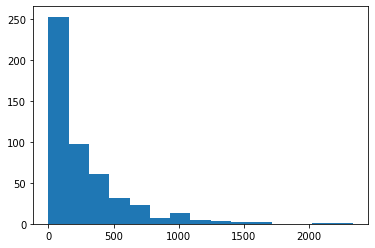

In [97]:
plt.hist(dt, bins=15)

In [98]:
active_class = 0
classes = np.zeros(10)

min = df["X"].min()
max = df["X"].max()

h = (max - min) / len(classes)

for idx, vidx in enumerate(df.index[:-1]):
    row = df.loc[vidx]
    idx = int((row['X'] - min) / h)
    classes[idx] += row['freq']


classes[-1]+=int(df.tail(1)['freq'])
classes


array([314.,  97.,  43.,  18.,  15.,   7.,   4.,   0.,   1.,   1.])

In [99]:
a = df.tail(1)
a

,X,freq,rel-freq
499,2336.7655,1,0.002


In [100]:
# skewness
# curtosis
# antikurtosis

In [101]:
series = dt.iloc[:, 0]
series

0      322.3876
1        8.0946
2      314.6983
3       17.5125
4        2.8544
         ...   
495      2.5121
496     25.1690
497    339.0075
498    951.8731
499    281.4005
Name: 0, Length: 500, dtype: float64

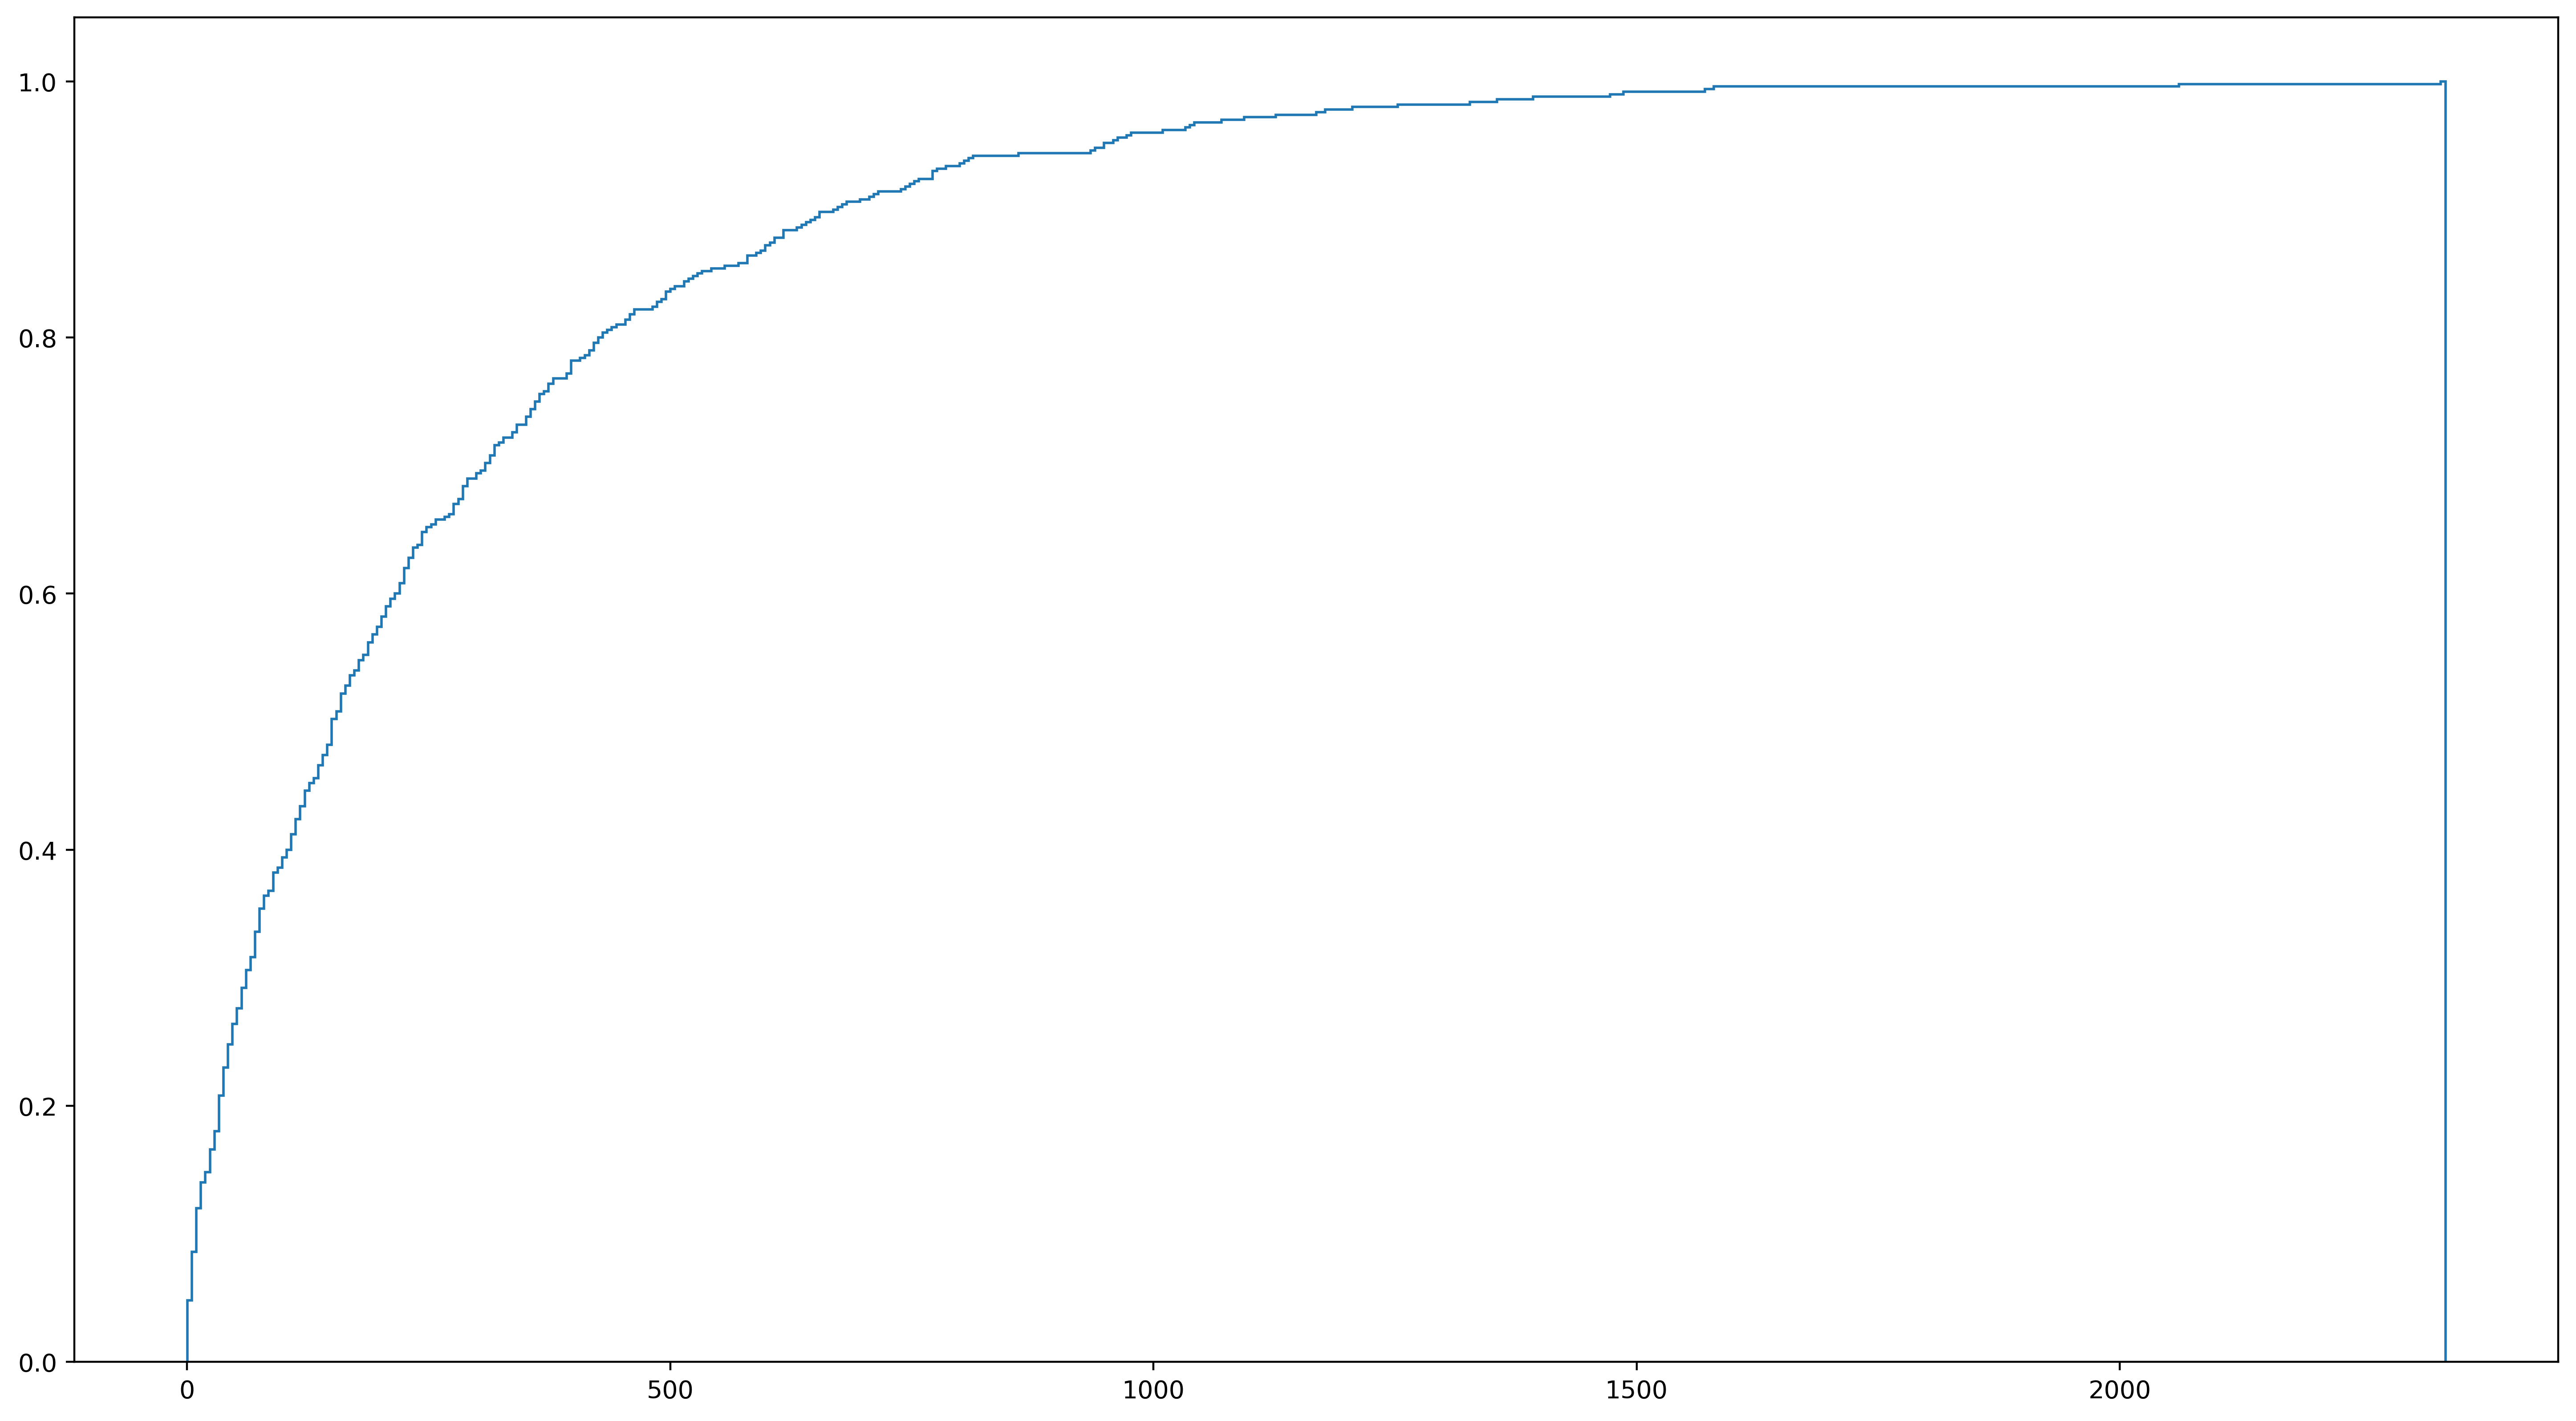

In [102]:
fig, ax = plt.subplots(figsize=(18,10), dpi=400)
n, bins, patches = ax.hist(series, len(series), density=True, histtype='step', cumulative=True)
plt.show()

In [103]:
df['cum'] = df['rel-freq'].cumsum()
df

,X,freq,rel-freq,cum
0,0.2925,1,0.002,0.002
1,0.4028,1,0.002,0.004
2,0.4996,1,0.002,0.006
3,0.8336,1,0.002,0.008
4,0.9248,1,0.002,0.010
...,...,...,...,...
495,1488.9943,1,0.002,0.992
496,1571.3524,1,0.002,0.994
497,1582.0907,1,0.002,0.996
498,2062.2559,1,0.002,0.998


In [104]:
def forward(x):
    return np.log(-np.log(1 - x))

def inverse(x):
    return (1 / np.exp(np.exp(x))) - 1

0.7899549891269276 -4.323128104972246


C:\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


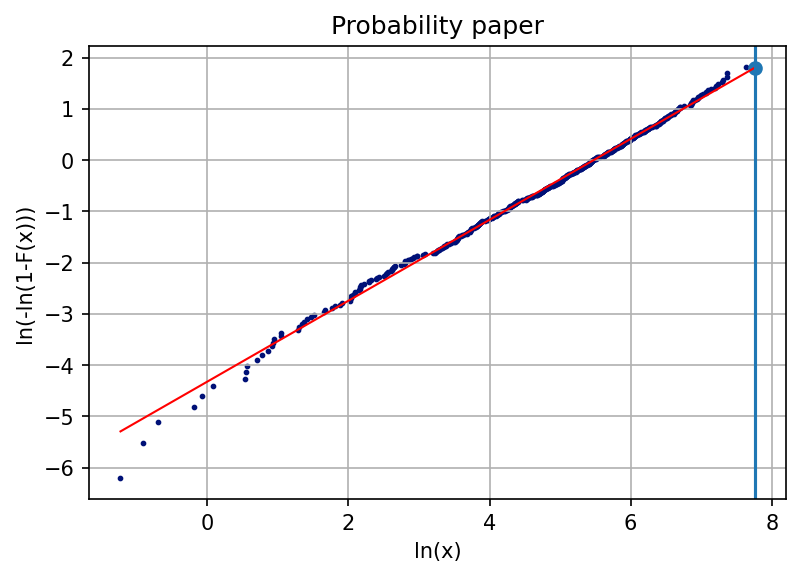

In [105]:
x = df['X']
y = df['cum']

t = np.log(x)
z = np.log(-np.log(1 - y))

fig, ax = plt.subplots(dpi=150)
ax.scatter(x=t, y=z, s=3, c='#001177')
ax.set(xlabel='ln(x)', ylabel='ln(-ln(1-F(x)))', title="Probability paper")
ax.grid()

x = t
y = z
meanx = x.mean()
meany = y.mean()
a = (x - meanx) * (y - meany)
b = (x - meanx) ** 2
a = a.sum()
b = b.sum()
m = a / b
c = meany - (m * meanx)
print(m,c)

x = np.array([x.min(), x.max()])
y = x * m + c
plt.plot(x, y, c='red', linewidth=1)
plt.axvline(x=x.max())

plt.scatter(x=[x.max()], y=[x.max() * m + c])

In [106]:
d = np.log(df['X'].values[-1])
print(d, x.max(), x.max()*m + c)

7.756522987185018 7.756522987185018 1.8041759270322588


In [107]:
ss = df['cum'].values[-1]
ss -= 1e-15
ss

0.9999999999999997

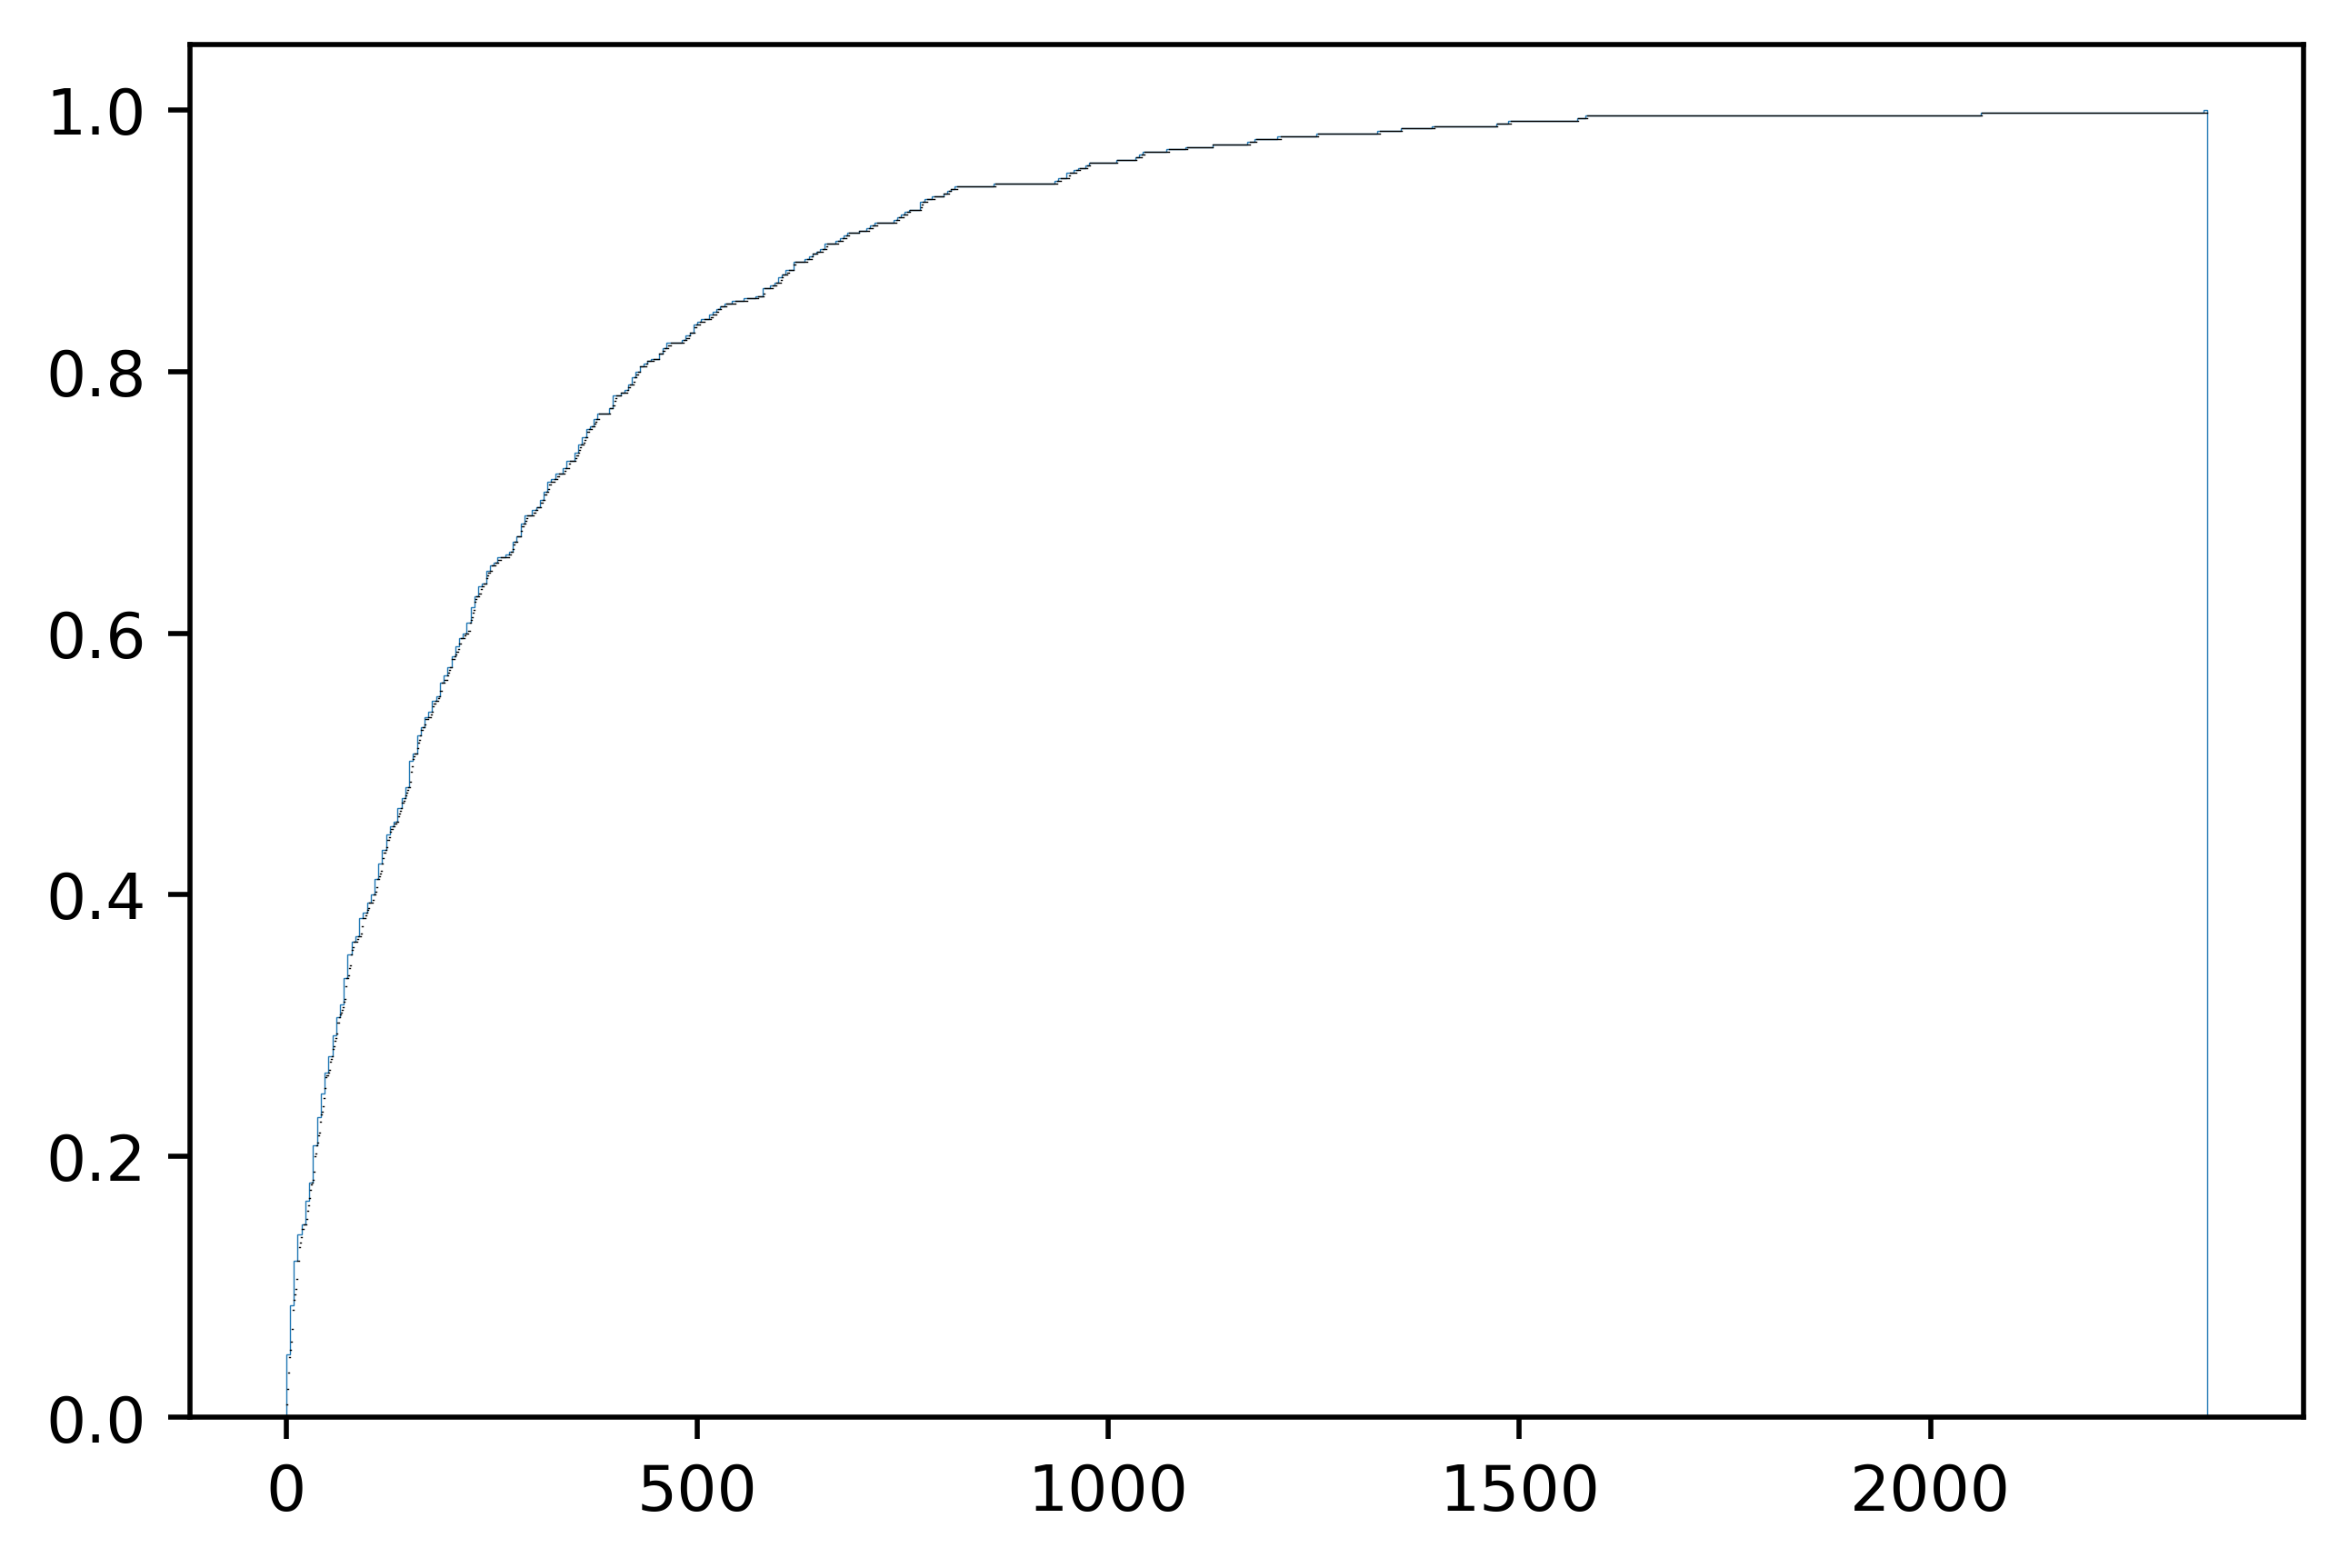

In [108]:

fig, ax = plt.subplots(dpi=500)
ax.hist(series, len(series), density=True, histtype='step', cumulative=True, linewidth=0.2)
for rn, ri in enumerate(df.index[:-1]):
    ax.plot([df.loc[ri]['X'], df.loc[ri+1]['X']], [df.loc[ri]['cum'], df.loc[ri]['cum']], linewidth=0.2, c='k')
    # ax.scatter(df.loc[ri]['X'], df.loc[ri]['cum'], s=0.05, c='k')

In [109]:
info

,count,mean,std,min,max,median
0,500.0,266.895515,319.928049,0.2925,2336.7655,154.08745


In [110]:
from scipy import stats

In [111]:
std = info['std'].values[0]
std_std = std / np.sqrt(len(t.index) * 2.0)
display(std)
display(std_std)
tt = stats.t.ppf(0.975, df=len(t.index) - 1)
sl = std - tt * std_std
sh = std + tt * std_std
print("[", sl, sh, "]")


319.9280487312684

10.117013213641506

[ 300.0508555214164 339.8052419411204 ]


21.54893048737637
278.63388906104086 362.4518528155235
319.07054376479465


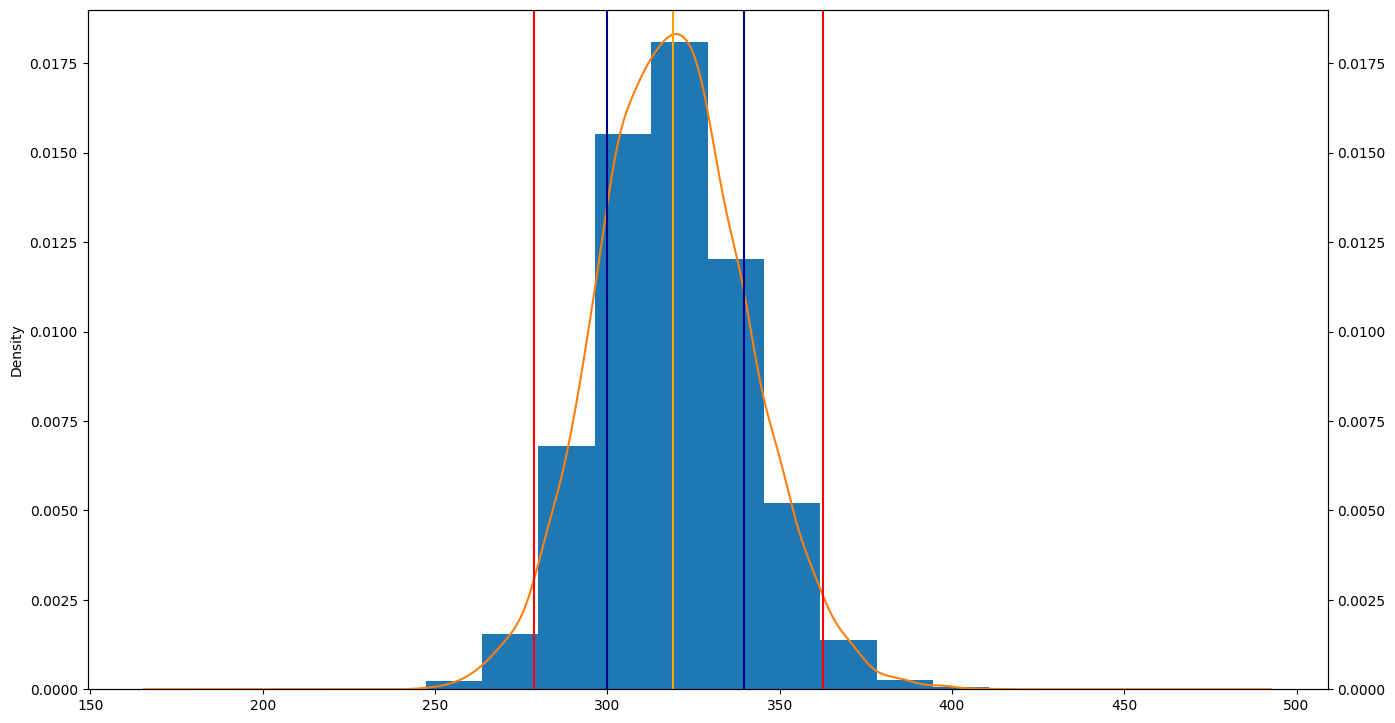

In [214]:
n = 10000

error = 0.05
stds = []
means = []
for i in range(n):
    sample = np.random.choice(dt.iloc[:, 0], len(dt.index), replace=True)
    stds.append(np.std(sample, ddof=1))
    means.append(np.mean(sample))

print(np.std(stds, ddof=1))
l,h = np.quantile(stds, error/2.0, interpolation='linear'), np.quantile(stds, 1.0 - error / 2.0, interpolation='linear')
print(l, h)
print(np.mean(stds))
plt.figure(figsize=(16, 9), dpi=100)
ax = pd.Series(stds).plot(kind='hist', density=True)
ax1 = pd.Series(stds).plot(kind='density', secondary_y=True)
ax1.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])



plt.axvline(l, c='red')
plt.axvline(h, c='red')
plt.axvline(sl, c='darkblue')
plt.axvline(sh, c='darkblue')
plt.axvline(np.mean(stds), c='orange')


14.351519194437598


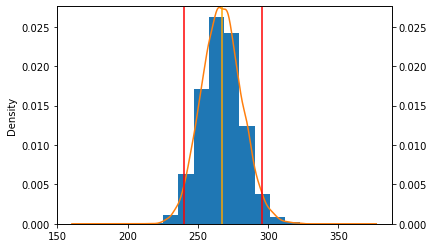

In [216]:
print(np.std(means, ddof=1))
ml,mh = np.quantile(means, error/2.0, interpolation='linear'), np.quantile(means, 1.0 - error / 2.0, interpolation='linear')
ax = pd.Series(means).plot(kind='hist', density=True)
ax1 = pd.Series(means).plot(kind='density', secondary_y=True)
ax1.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
plt.axvline(ml, c='red')
plt.axvline(mh, c='red')
plt.axvline(np.mean(means), c='orange')